In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

# Load Dataset

In [20]:
data = pd.read_csv('../data/20140101_20211001_PM10_observed.csv', header = None, names = ['date', 'PM10'])
data.head()

,date,PM10
0,2014-01-01,106
1,2014-01-02,85
2,2014-01-03,59
3,2014-01-04,57
4,2014-01-05,33


# Compute Mid Price

In [21]:
mid_prices = data['PM10'].values

# Create Windows

In [22]:
seq_len = 24
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

# Normalize Data

In [23]:
normalized_data = []
for window in result:
    normalized_window = [((int(p) / int(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((2525, 24, 1), (281, 24, 1))

# Build a Model

In [24]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(24, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='swish'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 24, 50)            10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


# Training

In [25]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=10)

Epoch 1/10
253/253 [==============================] - 7s 15ms/step - loss: 0.2839 - val_loss: 1.3466
Epoch 2/10
253/253 [==============================] - 3s 14ms/step - loss: 0.2507 - val_loss: 1.3203
Epoch 3/10
253/253 [==============================] - 3s 13ms/step - loss: 0.2257 - val_loss: 1.3149
Epoch 4/10
253/253 [==============================] - 3s 13ms/step - loss: 0.2182 - val_loss: 1.3329
Epoch 5/10
253/253 [==============================] - 3s 13ms/step - loss: 0.2139 - val_loss: 1.3136
Epoch 6/10
253/253 [==============================] - 3s 13ms/step - loss: 0.2024 - val_loss: 1.3489
Epoch 7/10
253/253 [==============================] - 3s 13ms/step - loss: 0.2040 - val_loss: 1.3296
Epoch 8/10
253/253 [==============================] - 3s 13ms/step - loss: 0.2009 - val_loss: 1.3011
Epoch 9/10
253/253 [==============================] - 3s 13ms/step - loss: 0.1987 - val_loss: 1.3098
Epoch 10/10
253/253 [==============================] - 3s 13ms/step - loss: 0.1996 - val_lo

# Prediction

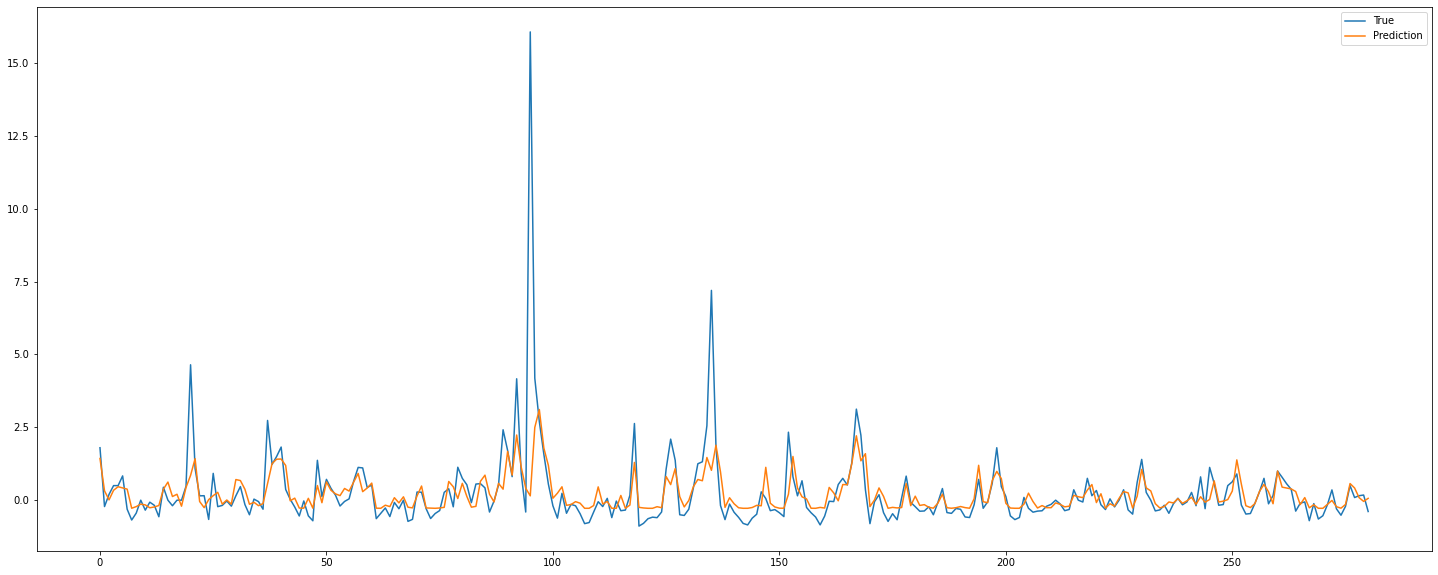

In [26]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(25, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()